# **Clustering Problem: Challenges and Approaches**
---
Author: Edwyn Javier Aldana


# **Introduction**

So far, we have focus on supervised techniques that attempt to find the one model that minimizes a **loss function** between the **predicted values** and **observed values**. In this regard, we can call them, error-driven models. Commonly, we are faced problems in which, observed values are not able, and instead, we have to attempt to find the model based exclusively on the **information conveys in the data**. For this, there are different approaches typically known as **clustering approaches**.

Given the lack of the prior outcome values to calculate a loss function, clustering approaches resort to a **simliarity measure**. In general the clustering aaproaches attempt to minimize the distance of the objects belonging to the same cluster and maximize the distance among clusters. Having defined a measure or metric (formally speaking), most methods require to define the **number of subsets** in which the dataset will be partitioned, several approaches are able to infer this value from the data and the metric.


# **The similarity measure**

**Proximity Measures**

Proximity measure are the most common way to determine the similarity among the dataset's elements. Most cases **Euclidean distance** is used, which is defined as:

$euclidean(p,q)=\sqrt{\sum_{i=1}^{D}(p_i-q_i)^2}$

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity

#A random dataset in R^n is genetated.

D=2#dimensionality
N=3#Cardianlity
X = np.random.rand(N, D)
#ax = sns.heatmap(X, linewidth=0.5)
distances=euclidean_distances(X, X)

width1 = 20
height1 = 5
rows=1
columns=2
width_height_1 = (width1, height1)
plt.clf() 
fig = plt.figure(figsize=width_height_1)
plt.subplot(rows, columns, 1)
plt.title("Spatial Arrangement")
sns.scatterplot(x=X[:,0], y=X[:,1], hue=range(0,N))

plt.subplot(rows, columns, 2)
plt.title("Euclidean Distance Matrix")
sns.heatmap(distances, linewidth=0.5)

**Exercise 1:** Set $D=1000$ and describe the resulting heat map of the Distance Matrix.

**Manhattan Distance**

$manhattan(p,q)=||p-q||=\sum_{i=1}^{D}|pi-qi|$

![manhattan_distance[1].png](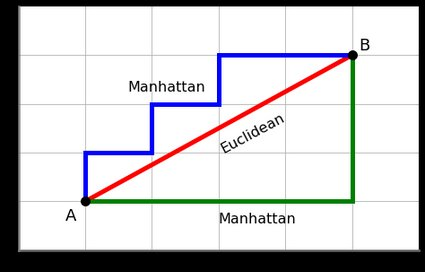)

<Figure size 432x288 with 0 Axes>

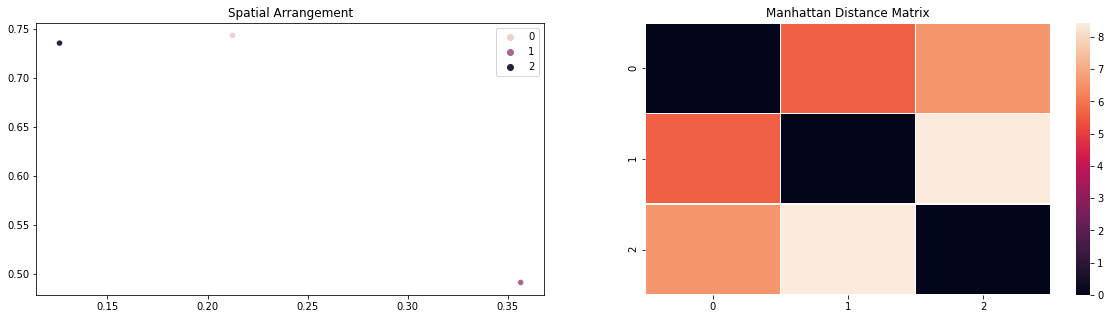

In [22]:
distances=manhattan_distances(X,X)
width1 = 20
height1 = 5
rows=1
columns=2
width_height_1 = (width1, height1)
plt.clf() 
fig = plt.figure(figsize=width_height_1)
plt.subplot(rows, columns, 1)
plt.title("Spatial Arrangement")
sns.scatterplot(x=X[:,0], y=X[:,1], hue=range(0,N))

plt.subplot(rows, columns, 2)
plt.title("Manhattan Distance Matrix")
sns.heatmap(distances, linewidth=0.5)


**Cosine Similarity and Cosine Distance**

Cosine Similarity is defined as the cosine of the angle between two vectors. The $cosine$ of 0° is 1, and it is less than 1 for any angle in the interval $(0, \pi]$ radians. **This similarity is a judgment of orientation and not magnitude**: 
1. two vectors with the same orientation have a cosine similarity of 1, 
2. two vectors oriented at 90° relative to each other have a similarity of 0, and 
3. two vectors diametrically opposed have a similarity of -1, **independent of their magnitude**



![1535343574742[1].jpg](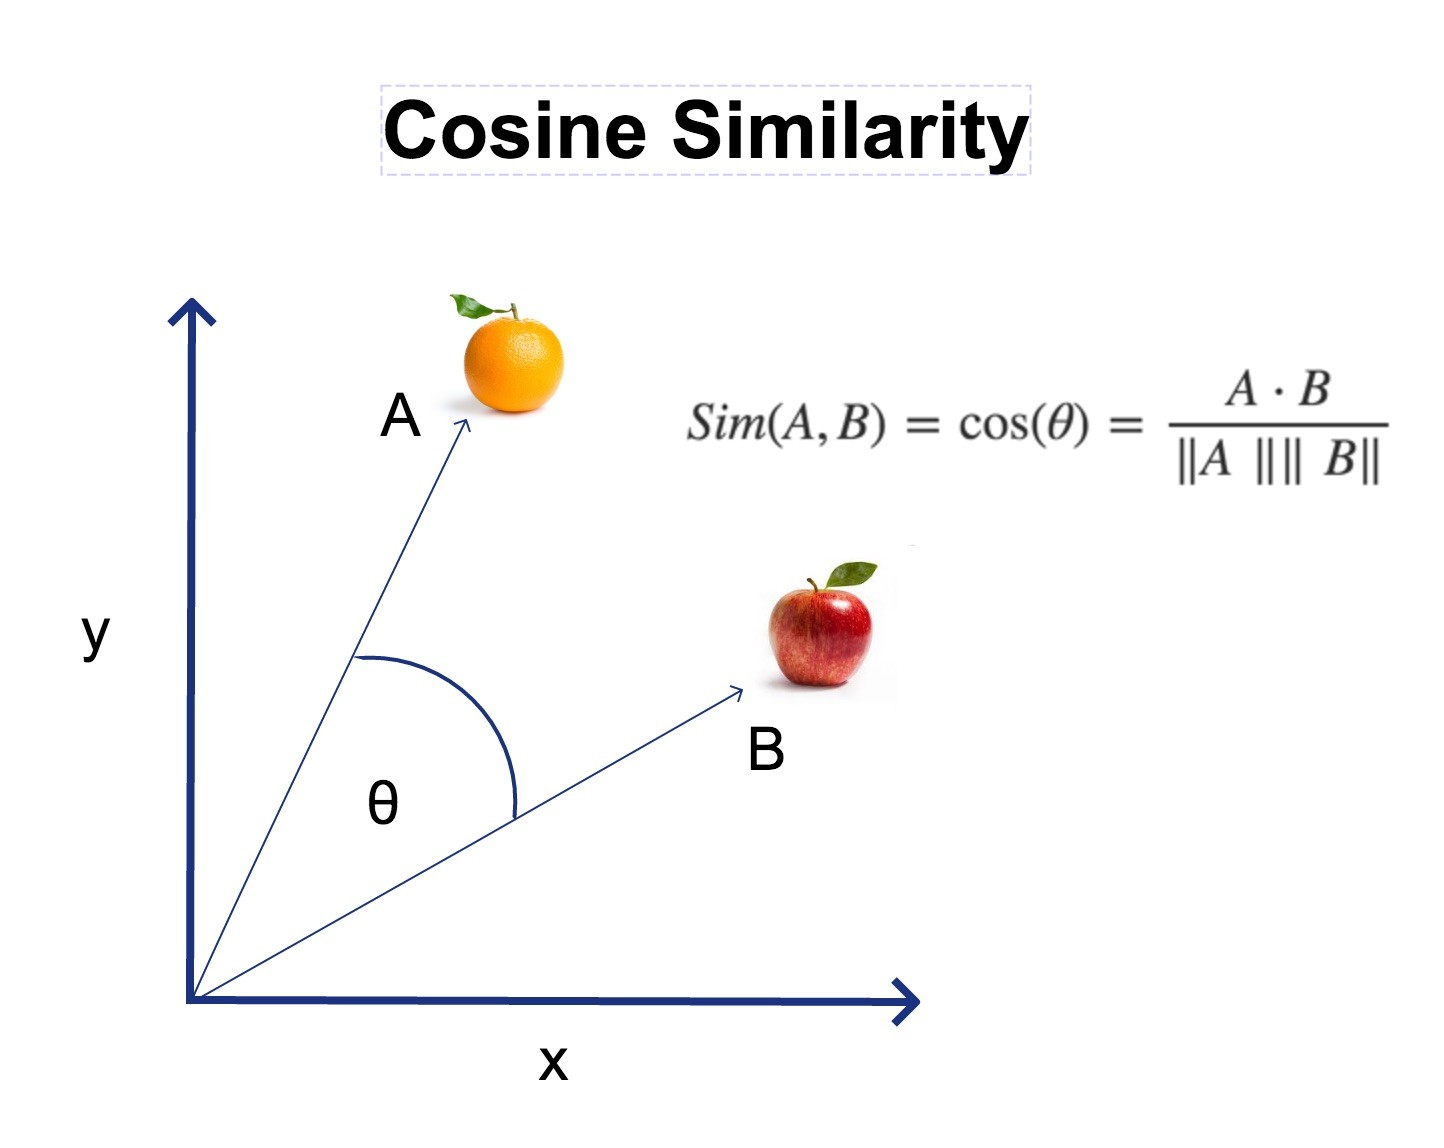)

<Figure size 432x288 with 0 Axes>

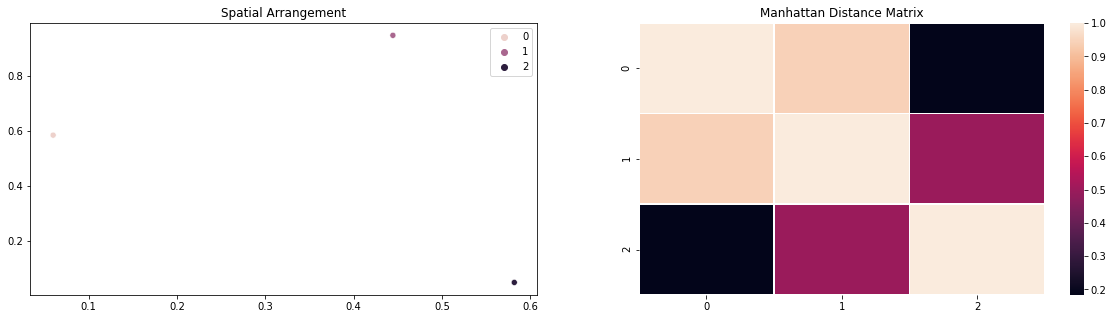

In [28]:
distances=cosine_similarity(X,X)
width1 = 20
height1 = 5
rows=1
columns=2
width_height_1 = (width1, height1)
plt.clf() 
fig = plt.figure(figsize=width_height_1)
plt.subplot(rows, columns, 1)
plt.title("Spatial Arrangement")
sns.scatterplot(x=X[:,0], y=X[:,1], hue=range(0,N))

plt.subplot(rows, columns, 2)
plt.title("Manhattan Distance Matrix")
sns.heatmap(distances, linewidth=0.5)

#**The number of groups or subsets**

Another important challenge to be considered is to define the number of clusters or groups. Given that, by definition, we do not have prior information about the groups in the dataset, typically this value must be inferred.

In [89]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
import sklearn.metrics

from google.colab import files
uploaded = files.upload()
import io
raw_data = pd.read_csv(io.BytesIO(uploaded['issues.csv']))
raw_data.dtypes

Saving issues.csv to issues (6).csv


PROBLEM_TYPE             object
COUNT                     int64
AVG_CALLS_TO_RESOLVE    float64
AVG_RESOLUTION_TIME       int64
REOCCUR_RATE            float64
REPLACEMENT_RATE        float64
dtype: object

**Data Description:** The dataset contains one record for each unique problem type. It has metrics for each type like count, average calls to resolve, average resolution time etc.

In [90]:
raw_data.head()

,PROBLEM_TYPE,COUNT,AVG_CALLS_TO_RESOLVE,AVG_RESOLUTION_TIME,REOCCUR_RATE,REPLACEMENT_RATE
0,Admin Password Lost,45,2.3,54,0.15,0.00
1,Windows Reboots automatically,47,3.1,132,0.30,0.03
2,System not coming up after reboot,12,4.0,154,0.02,0.05
3,Slow system,165,1.2,32,0.03,0.00
4,Internet Connectivity loss,321,1.0,5,0.21,0.00


We want to create groups of issues in order to support the making decisions regarding the customer service.

In [91]:
clust_data = raw_data.drop("PROBLEM_TYPE",axis=1) # remove the 
clust_data.head()

,COUNT,AVG_CALLS_TO_RESOLVE,AVG_RESOLUTION_TIME,REOCCUR_RATE,REPLACEMENT_RATE
0,45,2.3,54,0.15,0.00
1,47,3.1,132,0.30,0.03
2,12,4.0,154,0.02,0.05
3,165,1.2,32,0.03,0.00
4,321,1.0,5,0.21,0.00


In [92]:
#Scaler data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(clust_data)
scaled_data=pd.DataFrame(scaled_data, columns =clust_data.columns)
clust_data=scaled_data

## A classical option: Elbow Method

It is based on the following criteria:

**Intracluster variance:**

$v_i=\sum_{i\in C_j}||x_i-C_j||^2$

**Average Distortion**

$\frac{v_i}{N}$


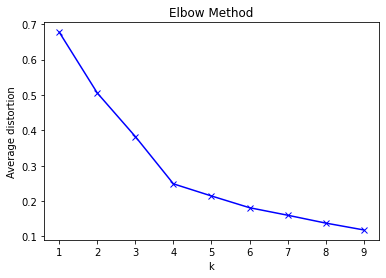

In [93]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
def elbow(clust_data, upperbound):
  clusters=range(1,upperbound)
  meanDistortions=[]
  #Execute k-means for each values of k
  for k in clusters:
      model=KMeans(n_clusters=k)
      model.fit(clust_data)
      prediction=model.predict(clust_data)
      #Sum(|xi-Ck|)/numData
      distortion=sum(np.min(cdist(clust_data, model.cluster_centers_, 'euclidean'), axis=1)) / clust_data.shape[0]
      meanDistortions.append(distortion)

  plt.plot(clusters, meanDistortions, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Average distortion')
  plt.title('Elbow Method')


elbow(clust_data,10)


**Criticism Elbow Method**

Tha above criteria does not work in all cases. Check the following dataset.

Saving equis.csv to equis (8).csv


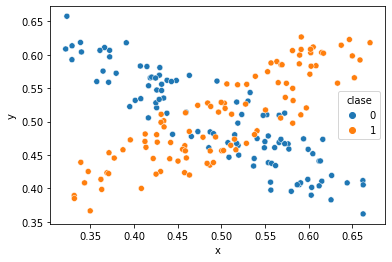

In [94]:
from google.colab import files
uploaded = files.upload()
import io
raw_data = pd.read_csv(io.BytesIO(uploaded['equis.csv']), sep="\t", header=None)
raw_data.columns=['x','y','clase']
sns.scatterplot(x=raw_data.x, y=raw_data.y, hue=raw_data.clase)


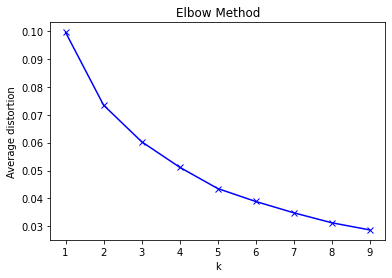

In [95]:
clust_data=raw_data[['x','y']]
elbow(clust_data,10)


Saving concentric to concentric (1)


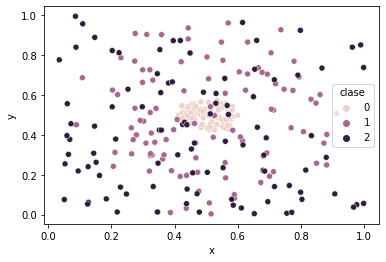

In [97]:
from google.colab import files
uploaded = files.upload()
import io
raw_data = pd.read_csv(io.BytesIO(uploaded['concentric']), sep="\t", header=None)
raw_data.columns=['x','y','clase']
sns.scatterplot(x=raw_data.x, y=raw_data.y, hue=raw_data.clase)

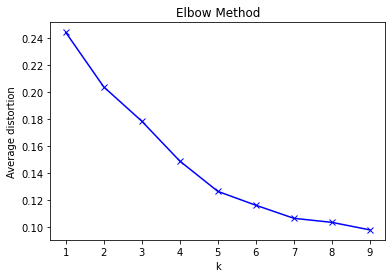

In [98]:
clust_data=raw_data[['x','y']]
elbow(clust_data,10)

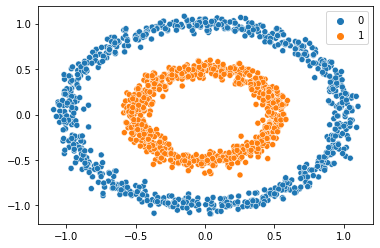

In [109]:
from sklearn import cluster, datasets
import numpy as np
n_samples = 1500 # Samples

#Noisy Circles
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
#Dataset to be clustered and reference solution
X,Y=noisy_circles
sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)

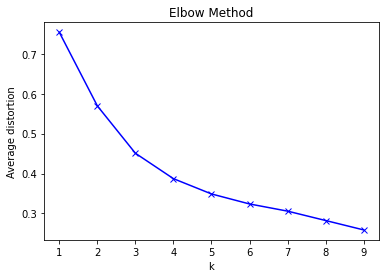

In [110]:
clust_data=X
elbow(clust_data,10)

**Exercise 2:** Using dataset **noisy moons** calculate the elbow method to determine the number of clusters. Discuss the results found. 

# **Clustering Approaches**

**Partitional Clustering**

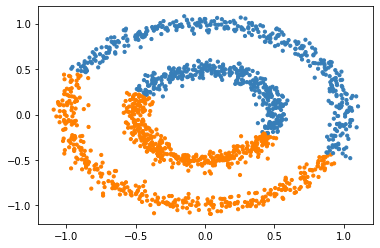

In [111]:
###################################################################
#Partitional Clustering
###################################################################
k_means=cluster.KMeans(n_clusters=2, random_state=0)
k_means.fit(X)
y_pred=k_means.predict(X)

###################################################################
#Visualization
###################################################################
import matplotlib.pyplot as plt
from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
plt.show()


**Density Approach**

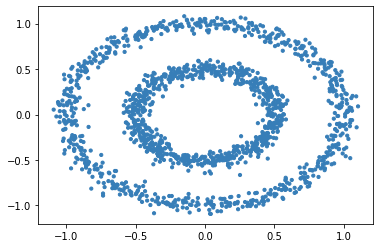

In [118]:
from sklearn.cluster import DBSCAN
import numpy as np

model= DBSCAN(eps=0.3, min_samples=5)
model.fit_predict(X)
y_pred=model.labels_.astype(np.int)

###################################################################
#Visualization
###################################################################
import matplotlib.pyplot as plt
from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
plt.show()


**Hierarchical Approach**

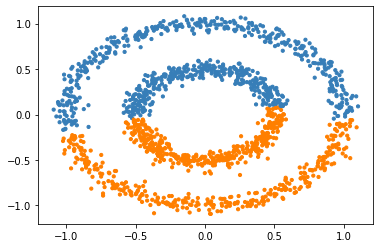

In [126]:
import numpy as np

from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

model = AgglomerativeClustering(n_clusters=2)
model = model.fit(X)
y_pred=model.labels_.astype(np.int)

###################################################################
#Visualization
###################################################################
import matplotlib.pyplot as plt
from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
plt.show()


# **Evaluation of the partition**

Assuming that we have overcame the problem of determinig the number of clusters, so far, we do not know how to assess the quality of the clusters found by a clustering method. There are metrics as ARI, cross entropy that can give us a criteria to evaluate the solution, the problem is that **they require a reference solution** and obviously in real cases such a reference is unknown. These measures are known as *External Indices*

There are other metrics based on the properties of the clusters found, most of them attempt to minimize the **intra-cluster** distance and maximize the **inter-cluster** distance. These measures are known as *Internal Indices*


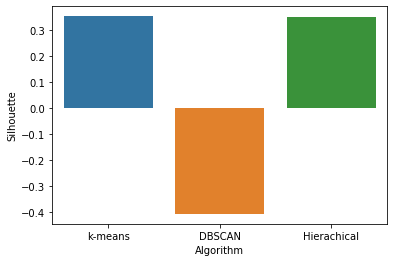

In [173]:
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score
from sklearn import metrics

#Model 1
k_means=cluster.KMeans(n_clusters=2, random_state=0)
k_means.fit(X)
y_pred_k=k_means.predict(X)

#Model 2
model= DBSCAN(eps=0.01, min_samples=5)
model.fit_predict(X)
y_pred_d=model.labels_.astype(np.int)

#Model 3
model = AgglomerativeClustering(n_clusters=2)
model = model.fit(X)
y_pred_h=model.labels_.astype(np.int)

#Externals Index
ARI=[adjusted_rand_score(Y, y_pred_k),
     adjusted_rand_score(Y, y_pred_d),
     adjusted_rand_score(Y, y_pred_h)]
print("Adjusted Rand Index", ARI)

#Mutual Information
mi=[adjusted_mutual_info_score(Y, y_pred_k),
    adjusted_mutual_info_score(Y, y_pred_d),
    adjusted_mutual_info_score(Y, y_pred_h)]
    
print("Mutual Information",mi)
external=list(zip(ARI, mi))
external=pd.DataFrame(external, columns =['ARI','Mutual_Information'])
external['Algorithm']=["k-means", "DBSCAN", "Hierachical"]
sns.barplot(x=external.Algorithm, y=external.ARI)

#Internal Index
#Silhoutte Coefficient
sil=[metrics.silhouette_score(X, y_pred_k),
     metrics.silhouette_score(X, y_pred_d),
     metrics.silhouette_score(X, y_pred_h)]
print("Silhouette Index",sil)

#Davis Bouldin
db=[metrics.davies_bouldin_score(X, y_pred_k),
    metrics.davies_bouldin_score(X, y_pred_d),
    metrics.davies_bouldin_score(X, y_pred_h)]
print("Davis Bouldin Index",db)

internal=list(zip(sil, db))
internal=pd.DataFrame(internal, columns =['Silhouette','Davis Bouldin'])
internal['Algorithm']=["k-means", "DBSCAN", "Hierachical"]
sns.barplot(x=internal.Algorithm, y=internal.Silhouette)

**Exercise 3.2.** Obtain the visualization for Davis Bouldin